<a href="https://colab.research.google.com/github/kjh8331267/AI_policy_analysis/blob/main/3_Exploratory_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
import pickle
import pandas as pd
file_path = '/content/drive/My Drive/data.pkl'
with open(file_path, 'rb') as file:
    data = pickle.load(file)
df = pd.DataFrame(data)
print(df)

     Unnamed: 0   id                                              Title  \
1             1    2      AI Governance Alliance: Briefing Paper Series   
2             2    3        Using AI in Industrial Operations Guidebook   
3             3    4  COMMUNICATION FROM THE COMMISSION TO THE EUROP...   
4             4    5  Szkolenia z zakresu AI dla nauczycieli szkół p...   
5             5    6  Can democracies cooperate with China on AI res...   
..          ...  ...                                                ...   
235         235  261                    Generative AI Framework for HMG   
237         237  263           CDEI publishes research on AI governance   
239         239  265  Patient-First Health with Generative AI: Resha...   
240         240  266  Synthetic Politics: Preparing democracy for Ge...   
241         241  267  OSTP RFI on National Priorities for Artificial...   

                            Translated title   Published  \
1                                      

In [ ]:
data.head(5)

,Unnamed: 0,id,Title,Translated title,Published,URL,PDF URL,Source ID,Source Name,Source Country,...,Policy Document Type,Policy Document Authors,Policy Document DOIs,Top Topics,Citations,Citations (Including Same Source),Languages,download_yn,file_name,text
1,1,2,AI Governance Alliance: Briefing Paper Series,NaN,2024-01-18,https://www.weforum.org/publications/ai-govern...,https://www3.weforum.org/docs/WEF_AI_Governanc...,weforum,World Economic Forum,IGO,...,Publication,World Economic Forum,NaN,Governance ; Artificial intelligence ; Generat...,0,0,eng,N,2_AI_Governance_Alliance__Briefing_Paper_Serie...,AI Governance Alliance \nBriefing Paper Serie...
2,2,3,Using AI in Industrial Operations Guidebook,NaN,2023-10-09,https://www.weforum.org/whitepapers/harnessing...,https://www3.weforum.org/docs/WEF_Harnessing_t...,weforum,World Economic Forum,IGO,...,Publication,World Economic Forum,NaN,Artificial intelligence ; Machine learning ; C...,0,0,eng,N,3_Using_AI_in_Industrial_Operations_Guidebook.pdf,Harnessing the \nAI Revolution in \nIndustri...
3,3,4,COMMUNICATION FROM THE COMMISSION TO THE EUROP...,NaN,2024-01-25,https://webapi2016.eesc.europa.eu/v1/documents...,https://webapi2016.eesc.europa.eu/v1/documents...,eesceu,European Economic and Social Committee,EU,...,Publication,European Economic and Social Committee,NaN,European High-Performance Computing Joint Unde...,23,28,eng,Y,4_COMMUNICATION_FROM_THE_COMMISSION_TO_THE_EUR...,\nEN EN \n \n \n EUROPEAN \nCOMMISSION \...
4,4,5,Szkolenia z zakresu AI dla nauczycieli szkół p...,AI training for primary school teachers,2024-01-27,https://efs-archiwum.men.gov.pl/wp-content/upl...,https://efs-archiwum.men.gov.pl/wp-content/upl...,governmentofpoland,Government of Poland,Poland,...,Publication,Ministry of National Education,NaN,Natural language processing ; Artificial intel...,0,0,pol,Y,5_Szkolenia_z_zakresu_AI_dla_nauczycieli_szkó...,Standardy kompetencji cyfrowych nauczycieli ob...
5,5,6,Can democracies cooperate with China on AI res...,NaN,2023-01-09,https://www.brookings.edu/research/can-democra...,https://www.brookings.edu/wp-content/uploads/2...,brookings,Brookings Institution,USA,...,Publication,Matt Sheehan ; Joshua P Meltzer ; Cameron F Kerry,NaN,Artificial intelligence ; Research ; China,1,2,eng,Y,6_Can_democracies_cooperate_with_China_on_AI_r...,CAN DEMOCRACIES \nCOOPERATE WITH \nCHINA ON AI...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 191 entries, 1 to 241
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Unnamed: 0                         191 non-null    int64 
 1   id                                 191 non-null    int64 
 2   Title                              191 non-null    object
 3   Translated title                   5 non-null      object
 4   Published                          191 non-null    object
 5   URL                                191 non-null    object
 6   PDF URL                            191 non-null    object
 7   Source ID                          191 non-null    object
 8   Source Name                        191 non-null    object
 9   Source Country                     191 non-null    object
 10  Source Type                        191 non-null    object
 11  Policy Document ID                 191 non-null    object
 12  Policy Docume

In [ ]:
!pip install geotext

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 20.2 MB/s eta 0:00:00


# **Document Distribution by Source Country**

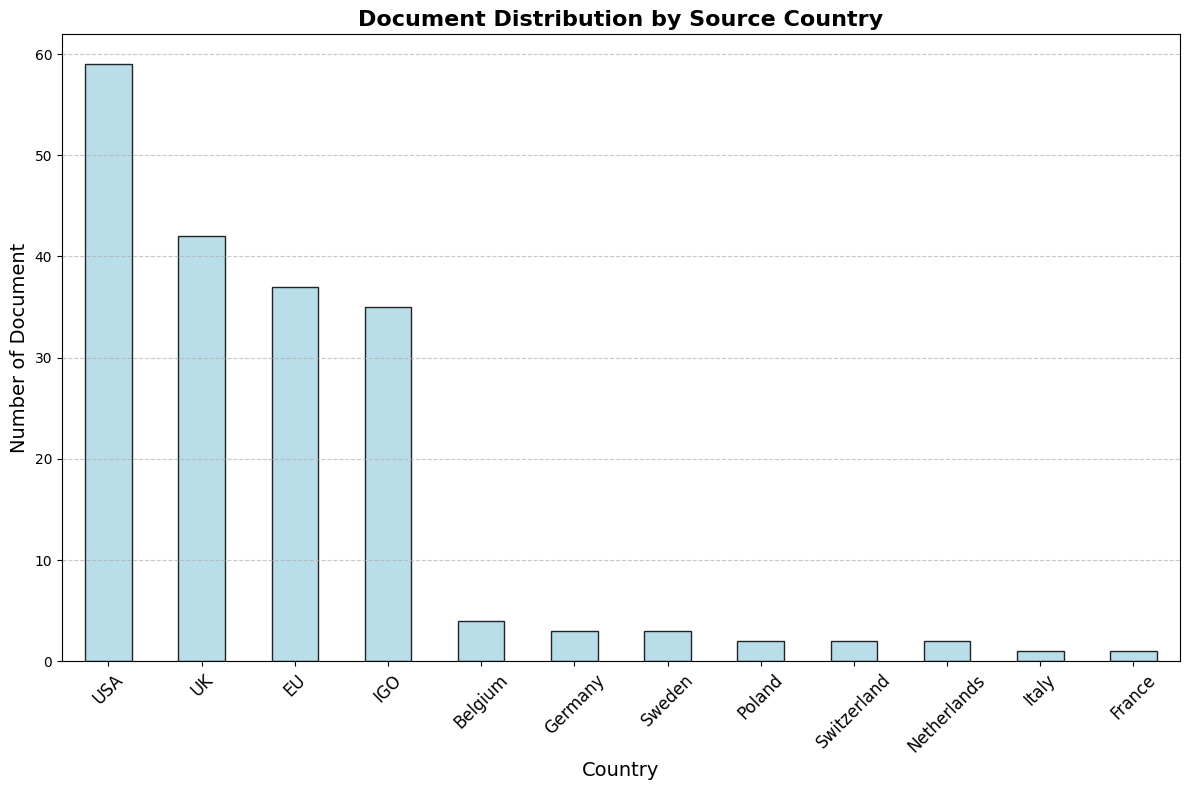

In [5]:
import matplotlib.pyplot as plt
from geotext import GeoText
country_counts = df['Source Country'].value_counts()  # Counting the number of mentions by country
country_counts = country_counts.sort_values(ascending=False)  # Sorting by the number of mentions
# Building the chart
plt.figure(figsize=(12, 8))
country_counts.plot(kind='bar', color='lightblue', edgecolor='black', alpha=0.85)
plt.title('Document Distribution by Source Country', fontsize=16, fontweight='bold')
plt.xlabel('Country', fontsize=14)
plt.ylabel('Number of Document', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# **Distribution of Document Types**

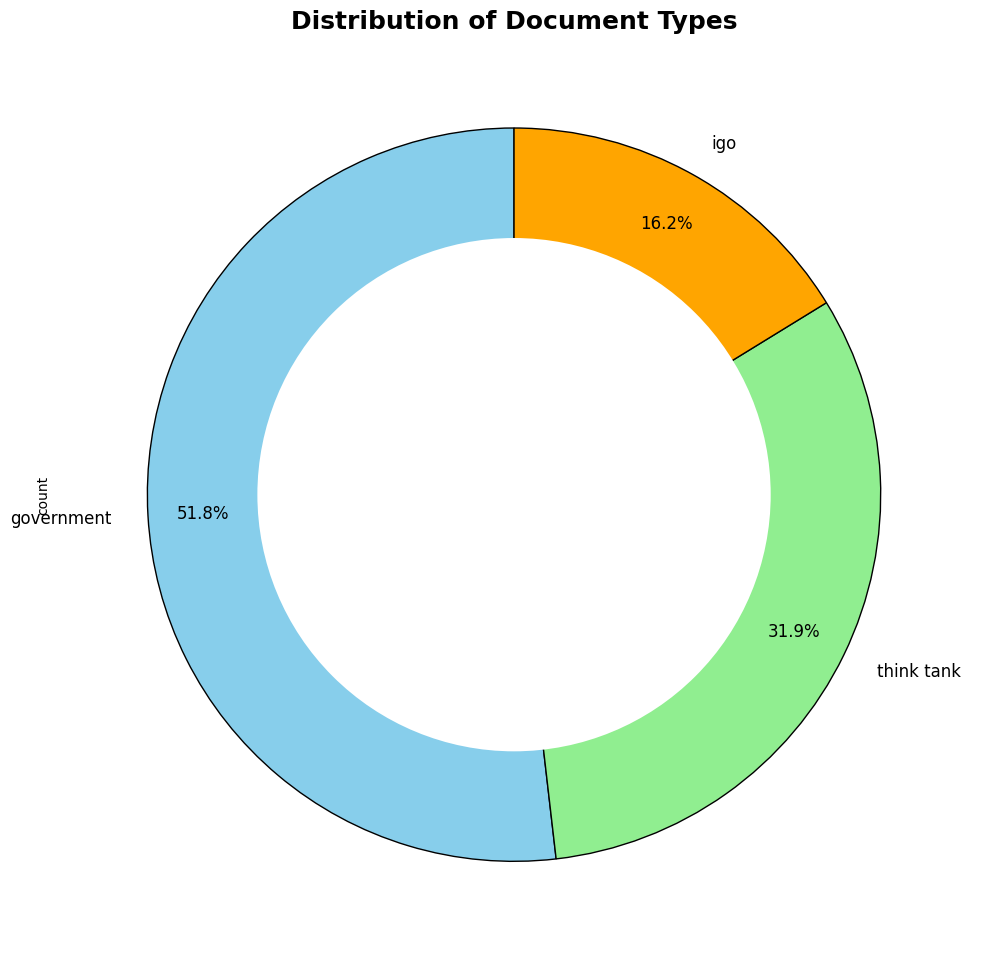

In [ ]:
import matplotlib.pyplot as plt
type_counts = df['Source Type'].value_counts()   # Count the number of documents by source type
plt.figure(figsize=(10, 10))  # Plot an enhanced pie chart
type_counts.plot(kind='pie', autopct=lambda p: f'{p:.1f}%' if p > 5 else '',
                 startangle=90, colors=['skyblue', 'lightgreen', 'orange', 'coral', 'gold'],
                 wedgeprops={'edgecolor': 'black', 'linewidth': 1}, textprops={'fontsize': 12}, pctdistance=0.85)

# Add title and center circle for donut effect
plt.title('Distribution of Document Types', fontsize=18, fontweight='bold')
plt.gca().add_artist(plt.Circle((0, 0), 0.70, fc='white'))
plt.tight_layout()
plt.show()

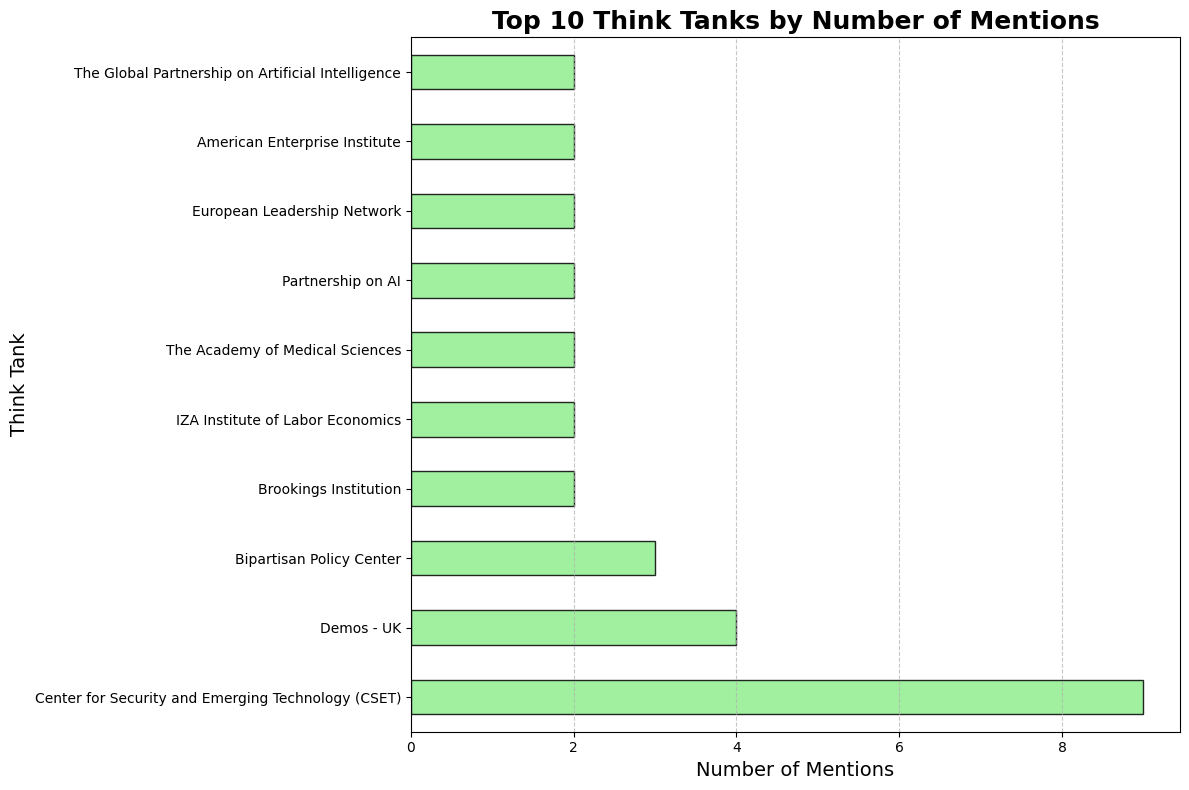

In [ ]:
# Top-10 think tanks
top_think_tanks = think_tank_counts.sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 8))
top_think_tanks.plot(kind='barh', color='lightgreen', edgecolor='black', alpha=0.85)
plt.title('Top 10 Think Tanks by Number of Documents', fontsize=18, fontweight='bold')
plt.xlabel('Number of Documents', fontsize=14)
plt.ylabel('Think Tank', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# **Analysis of Top Topics**

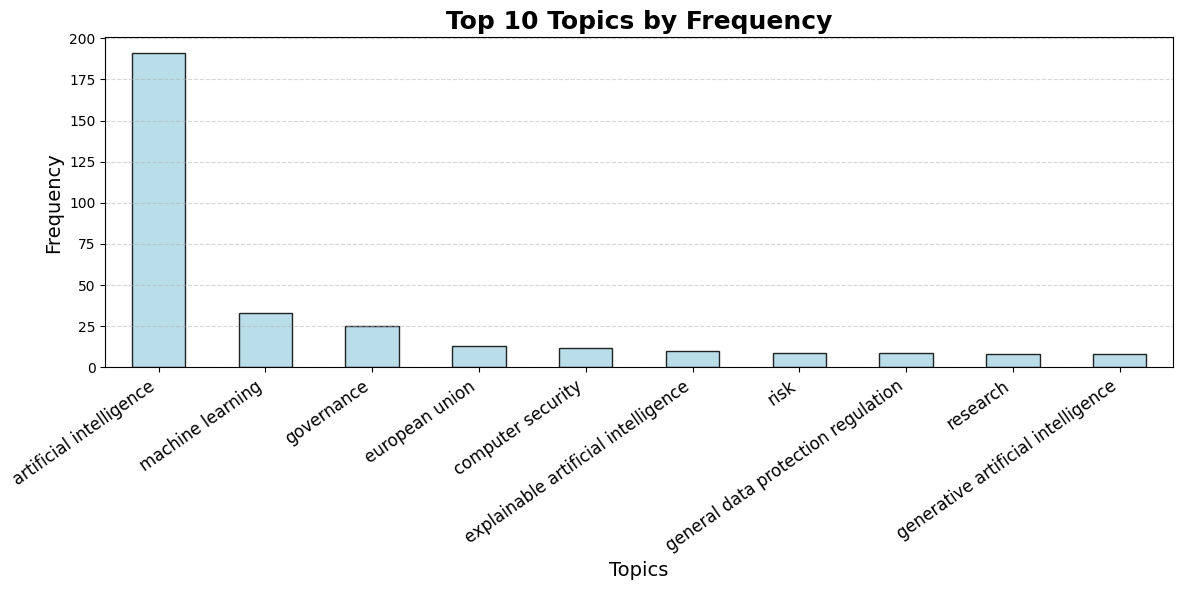

In [ ]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
# Extract and clean topics
topics = df['Top Topics'].dropna().str.split(';').explode()  # Split and flatten topics
topics = topics.str.strip().str.lower()  # Remove extra spaces and standardize to lowercase
topic_counts = topics.value_counts()  # Count occurrences of each topic
top_topics = topic_counts.head(10)  # Show top 10 topics
plt.figure(figsize=(12, 6))  # Plot t top 10 topics
top_topics.plot(kind='bar', color='lightblue', edgecolor='black', alpha=0.85)
plt.title('Top 10 Topics by Frequency', fontsize=18, fontweight='bold')
plt.xlabel('Topics', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=35, fontsize=12, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# **Document Count by Source Name**

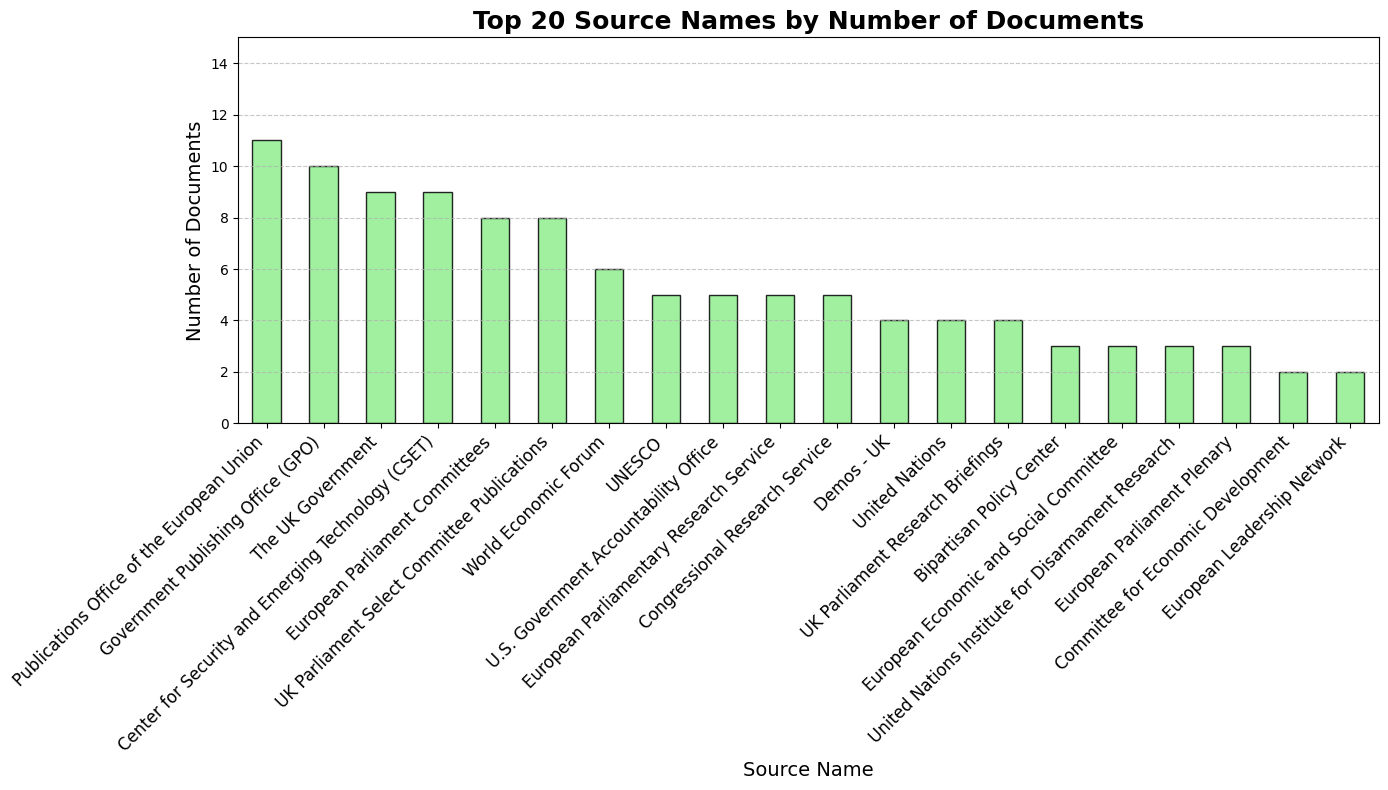

In [ ]:
plt.figure(figsize=(14, 8))
top_sources.plot(kind='bar', color='lightgreen', edgecolor='black', alpha=0.85)
plt.title('Top 20 Source Names by Number of Documents', fontsize=18, fontweight='bold')
plt.xlabel('Source Name', fontsize=14)
plt.ylabel('Number of Documents', fontsize=14)
plt.xticks(rotation=45, fontsize=12, ha='right')
plt.ylim(0, 15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()